In [655]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcess
import pandas_datareader as data
from mpl_toolkits import mplot3d
from matplotlib import dates as date
import seaborn as sns; sns.set() 
import datetime
plt.style.use('fivethirtyeight')

In [643]:
#Load dataset
data=pd.read_csv("data/marathon.csv")
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [656]:
#Convert for race times
def convert_time(s):
    h,m,s=map(int,s.split(":"))
    return datetime.timedelta(hours=h,minutes=m,seconds=s)

data=pd.read_csv('data/marathon.csv',converters={'split':convert_time,'final':convert_time})


In [659]:
data['split_sec'] = data['split']/np.timedelta64(1,'s')
data['final_sec'] = data['final']/np.timedelta64(1,'s')

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


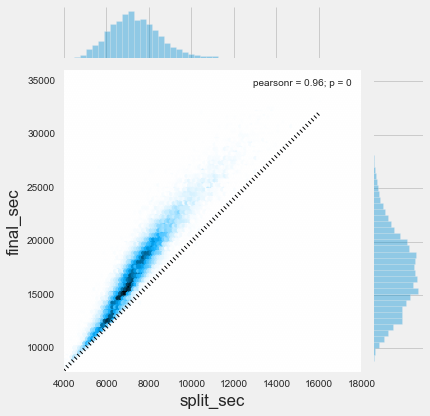

In [667]:
g=sns.jointplot('split_sec','final_sec',data,kind='hex')
g.ax_joint.plot(np.linspace(4000,16000),np.linspace(8000,32000),':k')

In [669]:
data['split_frac']=1-2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


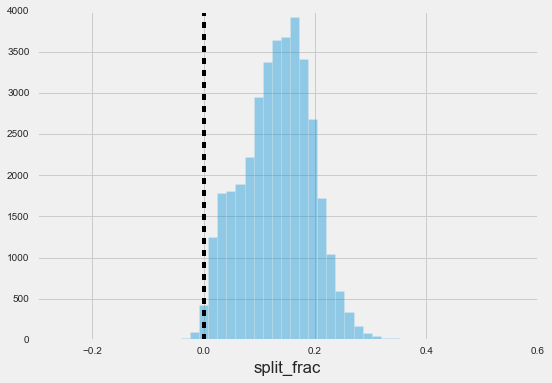

In [670]:
sns.distplot(data['split_frac'],kde=False)
plt.axvline(0,color='k',linestyle='--')

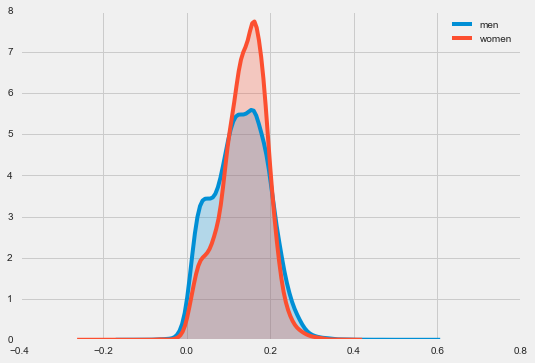

In [674]:
sns.kdeplot(data.split_frac[data.gender=='M'],label='men',shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'],label='women',shade=True)

In [675]:
data['age_dec']=data.age.map(lambda age: 10*(age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30
